2.6781825477428822
[1.95434943 2.03054239 2.10673535 2.18292831 2.25912127 2.33531423
 2.41150719 2.48770015 2.56389311 2.64008607 2.71627903 2.79247199
 2.86866495 2.94485791 3.02105087 3.09724383 3.17343679 3.24962975
 3.32582271 3.40201567]


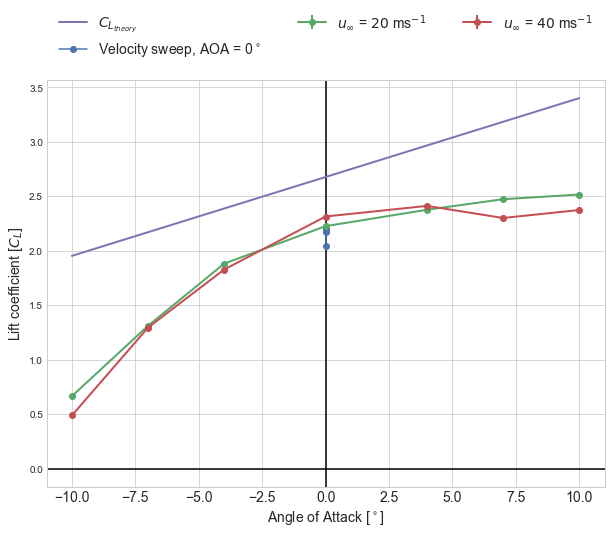

In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sb
sb.set_style('whitegrid')
sb.set_palette('deep')

#stack measures:
AOA_all = ([0, 0, 0, 0])
DF_all  = ([4.8000,46.0000,128.7000,175.9000])
v_all   = ([10.1100,30.1200,50.4100,59.3700])


DF20 = ([6.2,12.2,17.5,20.7,22.1,23,23.4])
DF20_std =  0.1072
DF40 = ([18.1,47.9,67.6,85.6,89.2,85.1,87.8])
DF40_std = 0.2125
AOAsweep = ([-10,-7,-4,0,4,7,10])
########
C_L   = DF20
b = 0.25; #250mm
c = 0.150; #150 mm
ARactual =  b/c;
h = 0.175; #175mm
AR = ARactual*(1+1.9*(h/b));
A = b*c



AOA = np.linspace(37-10, 37+10, 20) #degrees
EAOA = 0 #degrees
alpha = AOA*np.pi/180;
alphal0 = EAOA*np.pi/180;

C_L_alpha = 2*np.pi/(1+2/AR)
CLTheory = C_L_alpha*(alpha + alphal0)

C_L_all   = np.array(DF_all)/(0.5*1.225*np.square(np.array(v_all)) * A)

CLkek = C_L_alpha*(37*np.pi/180 + alphal0)

print(CLkek)

v20_mean = 20.1171
v20_std  = 0.0027
v40_mean = 40.1186
v40_std  = 0.0012

CL20 = DF20/(0.5*1.225*np.square(v20_mean) * A)
CL20_err = DF20/(0.5*1.225*np.square(v20_mean+v20_std) * A) - DF20/(0.5*1.225*np.square(v20_mean) * A)
CL40 = DF40/(0.5*1.225*np.square(v40_mean) * A)
CL40_err = DF40/(0.5*1.225*np.square(v40_mean+v40_std) * A) - DF40/(0.5*1.225*np.square(v40_mean) * A)

plt.figure(figsize=(10, 7.5))  
ax = plt.subplot(111)    
plt.axhline(0, color='black')
plt.axvline(0, color='black')
ax.errorbar(AOA_all, C_L_all, label = 'Velocity sweep, AOA = 0$^\circ$', marker='o') 
ax.errorbar(AOAsweep, CL20, yerr=CL20_err, fmt='-o', label = '$u_\infty$ = $20$ ms$^{-1}$', lw=2)
ax.errorbar(AOAsweep, CL40, yerr=CL40_err, fmt='-o', label = '$u_\infty$ = $40$ ms$^{-1}$', lw=2)

#cl20 = plt.plot(AOAsweep, CL20, label = '$u_\infty$ = $20$ ms$^{-1}$', lw=2) 
#cl40 = plt.plot(AOAsweep, CL40, label = '$u_\infty$ = $40$ ms$^{-1}$', lw=2) 

cltheory = plt.plot(AOA-37, CLTheory, label = '$C_{L_{theory}}$', lw=2) 
plt.legend(loc=3,fontsize=14, bbox_to_anchor=(0., 1.02, 1., .102), ncol=3, mode='expand')

#plt.yticks(range(0, 2.5, 10), fontsize=14)    
plt.xticks(fontsize=14) 
plt.xlabel('Angle of Attack [$^\circ$]', fontsize=14)
plt.ylabel('Lift coefficient [$C_L$]', fontsize=14)

print(CLTheory)
plt.savefig('../../report/figures/clperAOAexperiment.png', bbox_inches='tight')

In [ ]:
}